In [75]:
import pandas as pd
import datetime as dt
from collections import Counter
import pandas_datareader.data as web 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.finance import candlestick_ohlc
from matplotlib import style
import bs4 as bs
import pickle
import requests
import os
import numpy
%matplotlib inline
style.use('ggplot')
from pandas_datareader._utils import RemoteDataError

In [2]:
plt.rcParams["figure.figsize"] = (20,8)

In [3]:
start = dt.datetime(2016,1,1)
end = dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day)

In [4]:
df = web.DataReader('KWALITY.NS', 'yahoo', start, end)

In [5]:
df.to_csv('stock_data/kwality.csv')

In [9]:
df = pd.read_csv('stock_data/kwality.csv', parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,143.75,151.25,142.40,147.60,2545500,147.4890
2016-01-04,146.10,146.10,133.75,137.35,2495500,137.2467
2016-01-05,138.20,142.00,135.25,139.70,1506900,139.5950
2016-01-06,139.75,142.70,136.75,137.30,775900,137.1968
2016-01-07,135.40,135.40,127.60,128.80,1235000,128.7032


In [10]:
bse_index_stocks = ['^BSESN', 'BSE-100.BO', 'BSE-MIDCAP.BO','BSE-SMLCAP.BO', 'BSE-500.BO']
bse_index_df = {}
for stock in bse_index_stocks:
    print (stock)
    df = web.DataReader(stock, 'yahoo', start, end)
    bse_index_df[stock] = df
#Unable to extract data for BSE-POWER,BSE-HC, BSE-REALTY

^BSESN
BSE-100.BO
BSE-MIDCAP.BO
BSE-SMLCAP.BO
BSE-500.BO


In [ ]:
"""
for stock, df in bse_index_df.items():
    print ("Printing the last 5 days value for the symbol " + stock)
    print (df['Adj Close'].tail())
    print ("\n\n") """

In [11]:
for stock, df in bse_index_df.items():
    print (type(df['Adj Close']))
    #df['Adj Close'].plot()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [7]:
df.to_csv('Dabur.csv')

In [12]:
df = pd.read_csv('stock_data/kwality.csv', parse_dates=True, index_col=0)

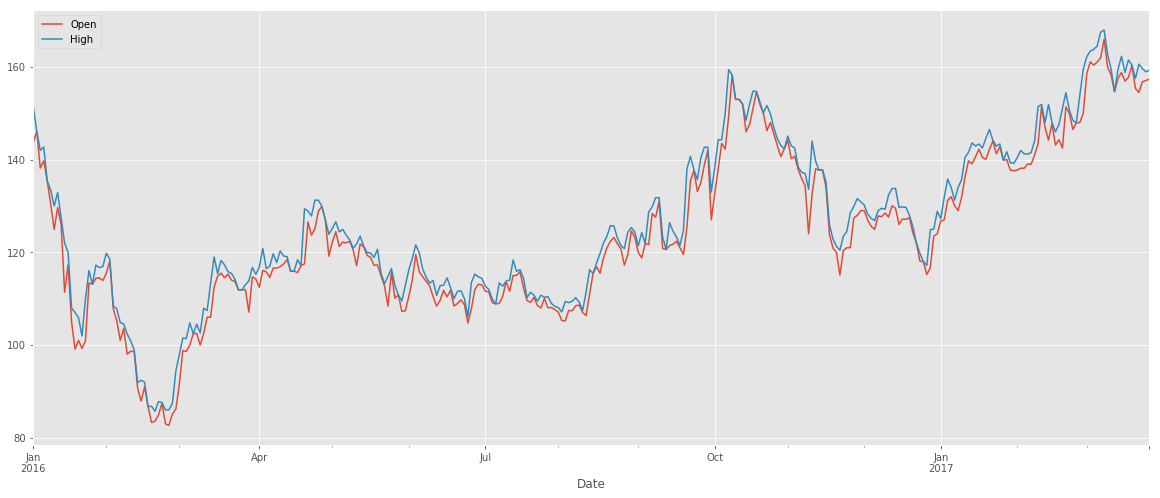

In [13]:
df[['Open', 'High']].plot()

In [14]:
df['25ma'] = df['Adj Close'].rolling(window=25).mean()
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

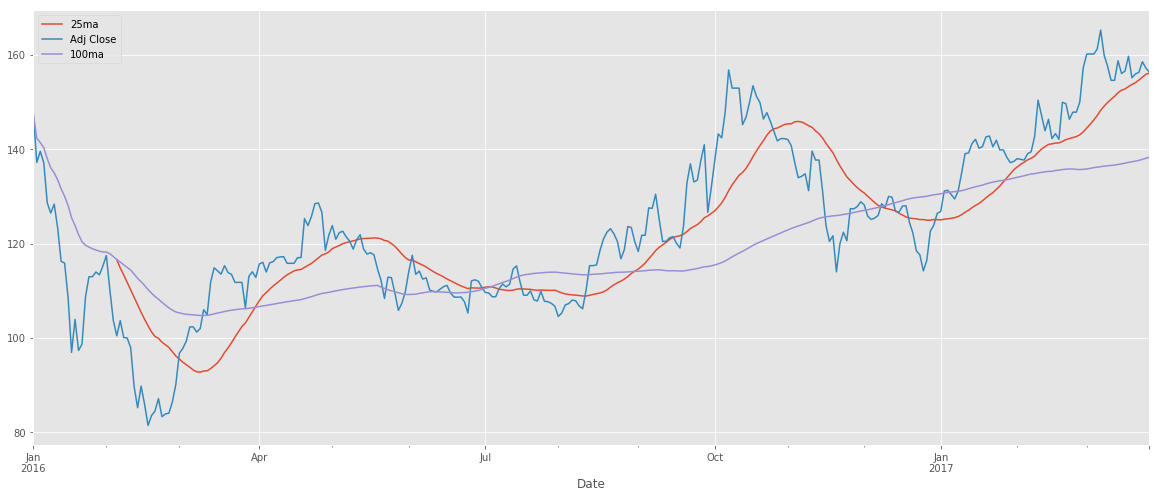

In [15]:
df[['25ma', 'Adj Close', '100ma']].plot()

In [16]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,25ma,100ma
Date,,,,,,,,
2016-01-01,143.75,151.25,142.40,147.60,2545500,147.4890,NaN,147.489000
2016-01-04,146.10,146.10,133.75,137.35,2495500,137.2467,NaN,142.367850
2016-01-05,138.20,142.00,135.25,139.70,1506900,139.5950,NaN,141.443567
2016-01-06,139.75,142.70,136.75,137.30,775900,137.1968,NaN,140.381875
2016-01-07,135.40,135.40,127.60,128.80,1235000,128.7032,NaN,138.046140


' Resample the data so that if you are provided with a millisecond data, \n    change it in such a way that you get daily data'

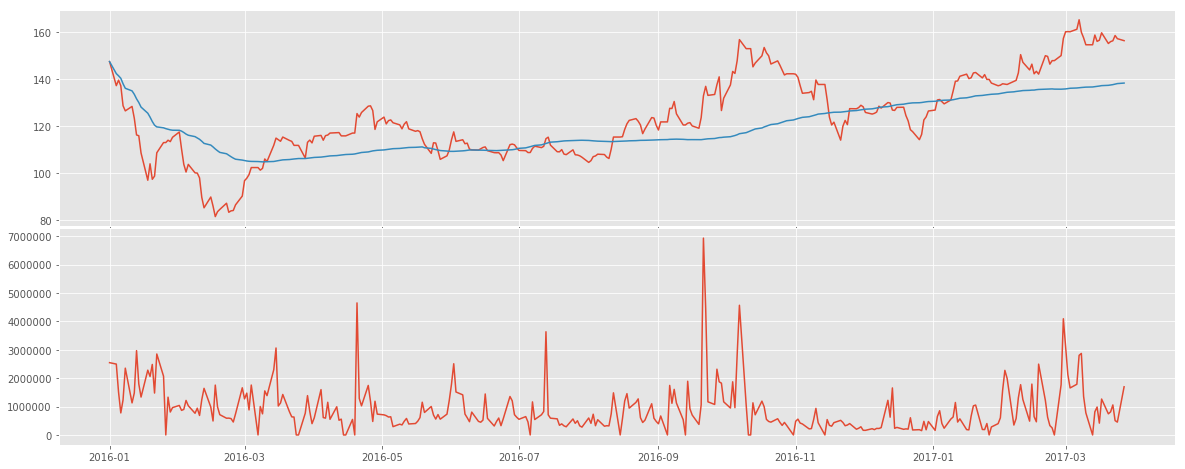

In [82]:
ax1 = plt.subplot2grid((40,1), (0,0), rowspan=20, colspan=1)
ax2 = plt.subplot2grid((40,1), (20,0), rowspan=20, colspan=1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.plot(df.index, df['Volume'])

""" Resample the data so that if you are provided with a millisecond data, 
    change it in such a way that you get daily data"""

In [17]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [18]:
print (df_ohlc.head())
print (df_volume.head())

                open      high       low     close
Date                                              
2016-01-01  147.4890  147.4890  126.5048  126.5048
2016-01-11  128.4034  128.4034   96.9770   97.3767
2016-01-21   98.7257  115.2633   98.7257  115.2633
2016-01-31  117.5116  117.5116  100.0247  100.0247
2016-02-10   97.9763   97.9763   81.4887   84.5364
Date
2016-01-01    10910400
2016-01-11    15529000
2016-01-21     9495800
2016-01-31     6754700
2016-02-10     8506000
Freq: 10D, Name: Volume, dtype: int64


In [19]:
df_ohlc.reset_index(inplace=True)

In [21]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

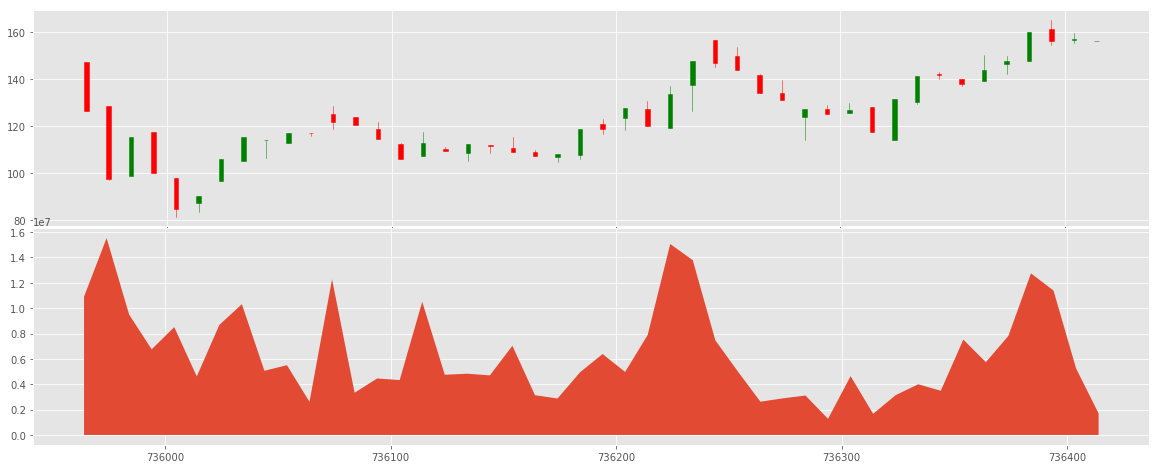

In [22]:
ax1 = plt.subplot2grid((40,1), (0,0), rowspan=20, colspan=1)
ax2 = plt.subplot2grid((40,1), (20,0), rowspan=20, colspan=1)

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values,0)

In [23]:
""" Get NSE 50 companies data"""
def save_nse50_companies_tickers():
  resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
  soup = bs.BeautifulSoup(resp.text, 'lxml')
  table = soup.find('table', {'class':'wikitable sortable'})
  tickers = []
  for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[1].text + ".NS"
    tickers.append(ticker)
  with open('nse-50.pickle', 'wb') as f:
    pickle.dump(tickers,f)
  print (tickers)
  return tickers

tickers = save_nse50_companies_tickers()
print (len(tickers))

['ACC.NS', 'ADANIPORTS.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BANKBARODA.NS', 'BHEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BOSCHLTD.NS', 'AUROPHARMA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DRREDDY.NS', 'GAIL.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'HDFC.NS', 'ITC.NS', 'ICICIBANK.NS', 'IDEA.NS', 'INDUSINDBK.NS', 'INFY.NS', 'KOTAKBANK.NS', 'LT.NS', 'LUPIN.NS', 'M&M.NS', 'MARUTI.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'INFRATEL.NS', 'RELIANCE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TECHM.NS', 'ULTRATECH.NS', 'EICHERMOT.NS', 'WIPRO.NS', 'YESBANK.NS', 'ZEEL.NS', 'TATAMTRDVR.NS']
51


In [54]:
import copy
unknown_ticker = []
def get_data_from_yahoo(reload_sp500=False):
  if reload_sp500==True:
    tickers = save_nse_companies_tickers()
  else:
    with open('nse-50.pickle', 'rb') as f:
      tickers = pickle.load(f)
  if not os.path.exists('stock_data'):
    os.makedirs('stock_data')
  start = dt.datetime(2016,1,1)
  end = dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day)


  
  for ticker in tickers:
    if not os.path.exists('stock_data/{}.csv'.format(ticker)):
      #print (ticker)
      try:
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_data/{}.csv'.format(ticker))
      except RemoteDataError:
            print ("Unable to get the data for the symbol given {}".format(ticker)) 
            unknown_ticker.append(ticker)
    else:
      print ("Already have the data for the ticker {}".format(ticker))

In [55]:
get_data_from_yahoo()

Already have the data for the ticker ACC.NS
Already have the data for the ticker ADANIPORTS.NS
Already have the data for the ticker AMBUJACEM.NS
Already have the data for the ticker ASIANPAINT.NS
Already have the data for the ticker AXISBANK.NS
Unable to get the data for the symbol given BAJAJ-AUTO.NS
Already have the data for the ticker BANKBARODA.NS
Already have the data for the ticker BHEL.NS
Already have the data for the ticker BPCL.NS
Already have the data for the ticker BHARTIARTL.NS
Already have the data for the ticker BOSCHLTD.NS
Already have the data for the ticker AUROPHARMA.NS
Already have the data for the ticker CIPLA.NS
Already have the data for the ticker COALINDIA.NS
Already have the data for the ticker DRREDDY.NS
Already have the data for the ticker GAIL.NS
Already have the data for the ticker GRASIM.NS
Already have the data for the ticker HCLTECH.NS
Already have the data for the ticker HDFCBANK.NS
Already have the data for the ticker HEROMOTOCO.NS
Already have the data

In [60]:
print (unknown_ticker)
#for ticker in unknown_ticker:
#    tickers.remove(ticker)
print (tickers)

['BAJAJ-AUTO.NS', 'M&M.NS', 'ULTRATECH.NS']
['ACC.NS', 'ADANIPORTS.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BANKBARODA.NS', 'BHEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BOSCHLTD.NS', 'AUROPHARMA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DRREDDY.NS', 'GAIL.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'HDFC.NS', 'ITC.NS', 'ICICIBANK.NS', 'IDEA.NS', 'INDUSINDBK.NS', 'INFY.NS', 'KOTAKBANK.NS', 'LT.NS', 'LUPIN.NS', 'MARUTI.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'INFRATEL.NS', 'RELIANCE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TECHM.NS', 'EICHERMOT.NS', 'WIPRO.NS', 'YESBANK.NS', 'ZEEL.NS', 'TATAMTRDVR.NS']


In [61]:
def compile_data():
  main_df = pd.DataFrame()
  for count,ticker_symbol in enumerate(tickers):
    df = pd.read_csv('stock_data/{}.csv'.format(ticker_symbol))
    df.set_index('Date', inplace=True)
    df.rename(columns = {'Adj Close': ticker_symbol}, inplace=True)
    df.drop(['Close', 'Open', 'High', 'Low', 'Volume'], 1, inplace=True)
    #print (df.head())
    if main_df.empty:
      main_df = df
    else:
      main_df = main_df.join(df, how='outer')
  #print (main_df.head())
  return main_df

main_df = compile_data()
print ((main_df.tail()))

             ACC.NS  ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AXISBANK.NS  \
Date                                                                           
2017-03-21  1413.05         325.75     237.14999        1068.70       488.30   
2017-03-22  1386.40         323.65     233.00000        1057.85       485.45   
2017-03-23  1400.75         325.60     232.64999        1061.60       488.25   
2017-03-24  1396.45         323.25     229.89999        1064.25       489.35   
2017-03-27  1396.80         319.30     227.60001        1042.90       487.15   

            BANKBARODA.NS  BHEL.NS  BPCL.NS  BHARTIARTL.NS  BOSCHLTD.NS  \
Date                                                                      
2017-03-21         162.85   168.95   641.90          349.9      22902.9   
2017-03-22         161.60   165.85   645.00          338.2      22987.2   
2017-03-23         162.20   167.95   655.05          338.5      22982.2   
2017-03-24         169.05   167.05   649.70          340.5      

In [62]:
main_df.to_csv('stock_data/NSE_50_data.csv')

In [63]:
main_df.columns

Index(['ACC.NS', 'ADANIPORTS.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS',
       'AXISBANK.NS', 'BANKBARODA.NS', 'BHEL.NS', 'BPCL.NS', 'BHARTIARTL.NS',
       'BOSCHLTD.NS', 'AUROPHARMA.NS', 'CIPLA.NS', 'COALINDIA.NS',
       'DRREDDY.NS', 'GAIL.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS',
       'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'HDFC.NS', 'ITC.NS',
       'ICICIBANK.NS', 'IDEA.NS', 'INDUSINDBK.NS', 'INFY.NS', 'KOTAKBANK.NS',
       'LT.NS', 'LUPIN.NS', 'MARUTI.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS',
       'INFRATEL.NS', 'RELIANCE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS',
       'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TECHM.NS',
       'EICHERMOT.NS', 'WIPRO.NS', 'YESBANK.NS', 'ZEEL.NS', 'TATAMTRDVR.NS'],
      dtype='object')

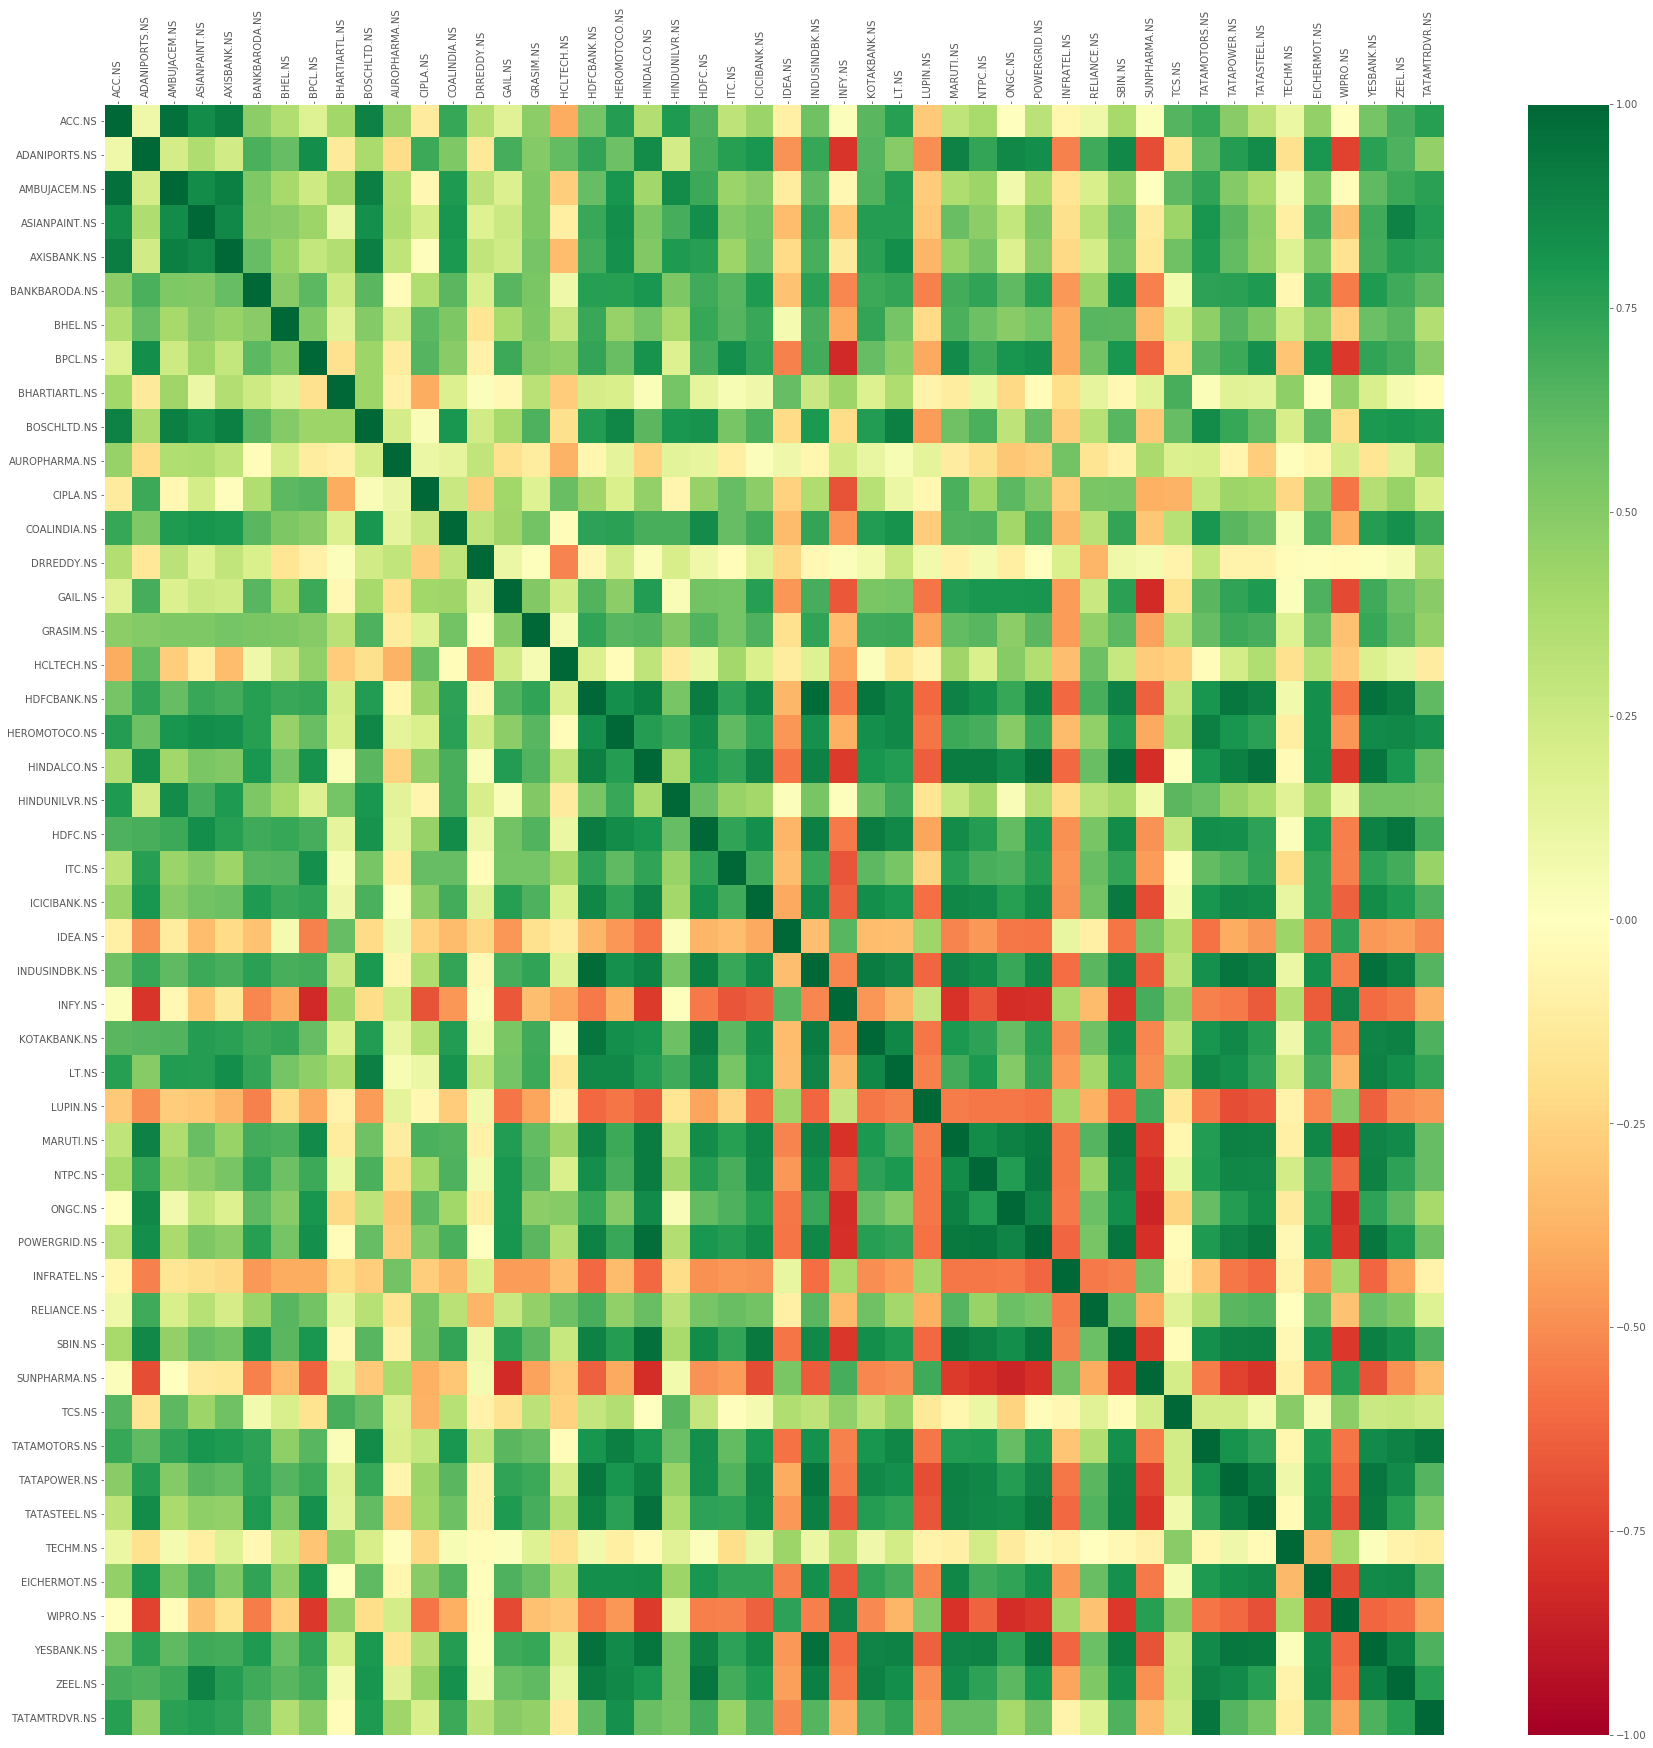

In [82]:
#Calculate the correlation among different Companies listed on the NSE Stock Exchange

def visualize_data(symbol):
    """ The function takes a symbol and plots the graph of the Adjusted Closing Prices"""
    df = pd.read_csv('stock_data/NSE_50_data.csv')
    #df[symbol].plot()
    df_corr = df.corr()
    #print (df_corr.head())
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(numpy.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(numpy.arange(data.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
   # plt.tight_layout()
from pylab import rcParams
rcParams['figure.figsize'] = 30, 30
visualize_data('ACC.NS')

In [68]:
df = pd.read_csv('stock_data/NSE_50_data.csv', parse_dates=True ,index_col=0)

In [69]:
df.head()

,ACC.NS,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AXISBANK.NS,BANKBARODA.NS,BHEL.NS,BPCL.NS,BHARTIARTL.NS,BOSCHLTD.NS,...,TCS.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TECHM.NS,EICHERMOT.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,TATAMTRDVR.NS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1346.82,266.34,202.13103,874.0851,445.73,159.05,169.117,407.1072,339.163,19060.82,...,2366.535,401.7373,66.56221,251.7280,513.8620,17276.17,547.99647,725.31,428.716,296.31
2016-01-04,1317.75,256.79,198.69092,876.1243,434.34,151.20,163.477,405.0172,325.517,18680.18,...,2320.701,376.8973,65.88645,251.2391,510.2554,17399.99,549.22748,698.87,417.872,277.83
2016-01-05,1315.11,254.55,200.50927,895.8689,432.41,148.10,164.565,410.1058,322.180,18498.50,...,2300.477,374.2984,66.94835,268.2556,515.6900,17066.42,548.43965,700.80,420.942,278.68
2016-01-06,1294.57,250.66,199.57553,881.6946,426.71,148.70,163.922,414.4901,320.935,18586.96,...,2332.453,365.7519,66.41741,262.8279,518.8519,17429.63,546.66695,696.99,419.060,273.19
2016-01-07,1275.10,243.89,194.21879,867.7191,405.46,139.50,152.146,401.7460,321.085,18175.05,...,2322.317,343.4109,64.05225,244.3933,504.7220,16942.89,541.49670,672.23,411.385,256.75


In [70]:
df.fillna(0, inplace=True)
df.columns.values

array(['ACC.NS', 'ADANIPORTS.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS',
       'AXISBANK.NS', 'BANKBARODA.NS', 'BHEL.NS', 'BPCL.NS',
       'BHARTIARTL.NS', 'BOSCHLTD.NS', 'AUROPHARMA.NS', 'CIPLA.NS',
       'COALINDIA.NS', 'DRREDDY.NS', 'GAIL.NS', 'GRASIM.NS', 'HCLTECH.NS',
       'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS',
       'HDFC.NS', 'ITC.NS', 'ICICIBANK.NS', 'IDEA.NS', 'INDUSINDBK.NS',
       'INFY.NS', 'KOTAKBANK.NS', 'LT.NS', 'LUPIN.NS', 'MARUTI.NS',
       'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'INFRATEL.NS', 'RELIANCE.NS',
       'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATAMOTORS.NS',
       'TATAPOWER.NS', 'TATASTEEL.NS', 'TECHM.NS', 'EICHERMOT.NS',
       'WIPRO.NS', 'YESBANK.NS', 'ZEEL.NS', 'TATAMTRDVR.NS'], dtype=object)

In [83]:
def process_data_for_labels(df):
    """Add a new column which indicates the percentage change in the price of the stock in one day """
    tickers = df.columns.values.tolist()
    print (tickers)
    for ticker in tickers:
      df['{}_percent_change'.format(ticker)] = (df[ticker].shift(-1) - df[ticker]) / df[ticker]
    return df
df = process_data_for_labels(df)
df.tail(10)
df.columns.values

['ACC.NS', 'ADANIPORTS.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BANKBARODA.NS', 'BHEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BOSCHLTD.NS', 'AUROPHARMA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DRREDDY.NS', 'GAIL.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'HDFC.NS', 'ITC.NS', 'ICICIBANK.NS', 'IDEA.NS', 'INDUSINDBK.NS', 'INFY.NS', 'KOTAKBANK.NS', 'LT.NS', 'LUPIN.NS', 'MARUTI.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'INFRATEL.NS', 'RELIANCE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TECHM.NS', 'EICHERMOT.NS', 'WIPRO.NS', 'YESBANK.NS', 'ZEEL.NS', 'TATAMTRDVR.NS']


array(['ACC.NS', 'ADANIPORTS.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS',
       'AXISBANK.NS', 'BANKBARODA.NS', 'BHEL.NS', 'BPCL.NS',
       'BHARTIARTL.NS', 'BOSCHLTD.NS', 'AUROPHARMA.NS', 'CIPLA.NS',
       'COALINDIA.NS', 'DRREDDY.NS', 'GAIL.NS', 'GRASIM.NS', 'HCLTECH.NS',
       'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS',
       'HDFC.NS', 'ITC.NS', 'ICICIBANK.NS', 'IDEA.NS', 'INDUSINDBK.NS',
       'INFY.NS', 'KOTAKBANK.NS', 'LT.NS', 'LUPIN.NS', 'MARUTI.NS',
       'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'INFRATEL.NS', 'RELIANCE.NS',
       'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATAMOTORS.NS',
       'TATAPOWER.NS', 'TATASTEEL.NS', 'TECHM.NS', 'EICHERMOT.NS',
       'WIPRO.NS', 'YESBANK.NS', 'ZEEL.NS', 'TATAMTRDVR.NS',
       'ACC.NS_percent_change', 'ADANIPORTS.NS_percent_change',
       'AMBUJACEM.NS_percent_change', 'ASIANPAINT.NS_percent_change',
       'AXISBANK.NS_percent_change', 'BANKBARODA.NS_percent_change',
       'BHEL.NS_percent_change', 'BPCL.NS_percent_c

In [86]:
def buy_sell_hold(*args):
    """Generate the target column to buy sell or hold the stock.
       Map this function to the data frame to create a new column"""
    columns = [c for c in args]
    requirement = 0.02
    for col in columns:
        if col > requirement:
            return 1
        if col < -1* requirement:
            return -1
    return 0